In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [3]:
file_path = "/content/insurance_claims.csv"
df=pd.read_csv(file_path)

In [4]:
df.info()
df.head()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PolicyholderNumber                10000 non-null  object 
 1   FirstPartyVehicleNumber           10000 non-null  object 
 2   PolicyholderOccupation            10000 non-null  object 
 3   FirstPolicySubscriptionDate       10000 non-null  object 
 4   FirstPartyVehicleType             10000 non-null  object 
 5   PolicyholderPostCode              10000 non-null  int64  
 6   PolicyWasSubscribedOnInternet     10000 non-null  int64  
 7   NumberOfPoliciesOfPolicyholder    10000 non-null  int64  
 8   FpVehicleAgeMonths                10000 non-null  int64  
 9   PolicyHolderAge                   10000 non-null  int64  
 10  FirstPartyLiability               10000 non-null  float64
 11  ReferenceId                       10000 non-null  object 
 12  Third

(10000, 26)

<ipython-input-6-97eb79e302e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Fraud'], palette='coolwarm')


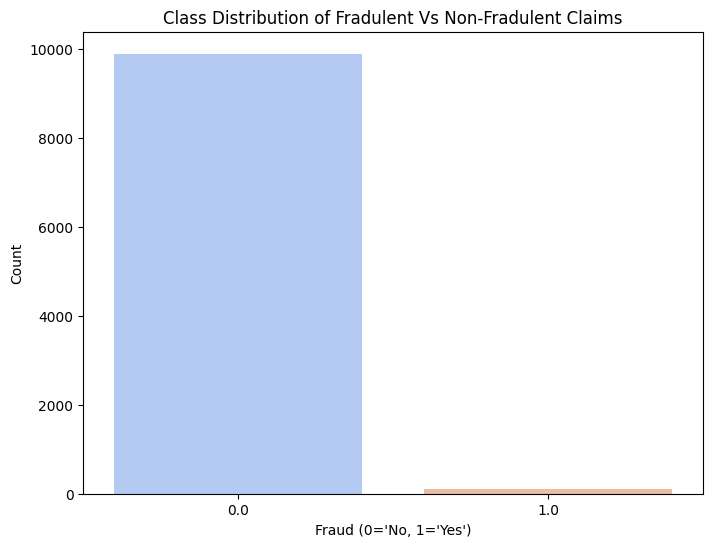

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Fraud'], palette='coolwarm')
plt.title('Class Distribution of Fradulent Vs Non-Fradulent Claims')
plt.xlabel("Fraud (0='No, 1='Yes')")
plt.ylabel('Count')
plt.show()

In [7]:
drop_cols = ["PolicyholderNumber", "FirstPartyVehicleNumber", "ReferenceId", "ThirdPartyVehicleNumber", "InsurerNotes", "FirstPolicySubscriptionDate", "LossDate"]
df = df.drop(columns = drop_cols)

In [8]:
df = pd.get_dummies(df,drop_first=True)

In [9]:
x = df.drop(columns = ["Fraud"])
y = df["Fraud"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
log_reg = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [16]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_proba)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [18]:
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc_score:.4f}")
print("Confusion Matrix:")
print(confusion_matrix)


Model Evaluation:
Accuracy: 0.5935
Precision: 0.0099
Recall: 0.4000
F1 Score: 0.0193
ROC AUC Score: 0.4557
Confusion Matrix:
[[1179  801]
 [  12    8]]


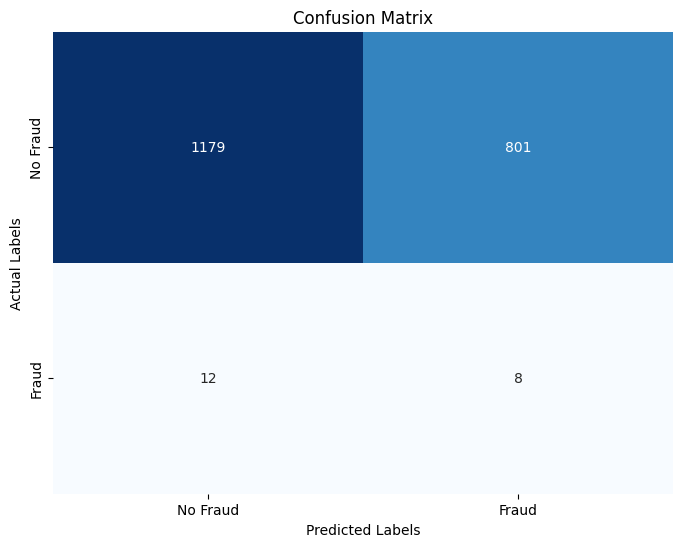

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [ ]:
# . The model performs poorly in fraud detection, particularly with regard to low precision and recall.
# . High false positives mean that the model is overcorrecting for class imbalance.
# . Apply feature selection to minimize noise.
# . Try ensemble techniques Random Forest, etc to improve the detection of fraud.